## Transformer inrush current at no load startup

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [2]:
# read in the magnetizing characteristics

df = pd.read_excel('b-h_curve.xlsx')
df.head()

,H [A/m],B [T],I magn [A],fi [Wb]
0,-30929,-1.814,-217.045614,-0.037187
1,-27837,-1.799,-195.347368,-0.036880
2,-24744,-1.794,-173.642105,-0.036777
3,-21651,-1.750,-151.936842,-0.035875
4,-18558,-1.715,-130.231579,-0.035158


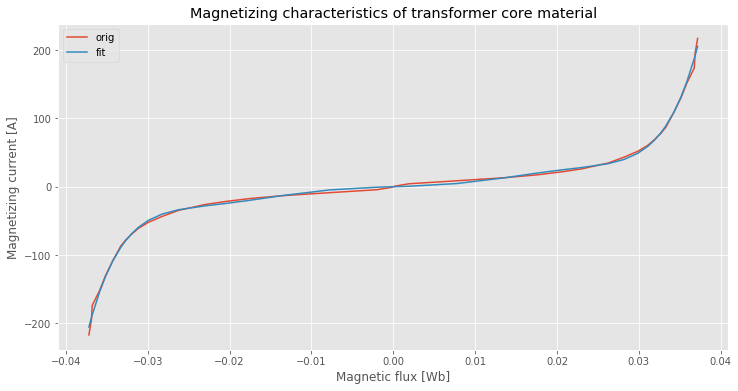

In [53]:
# assign data to variables
fi = df['fi [Wb]']
I = df['I magn [A]']

# polynominal fit
# k gives polynominal coefficients
k = np.polyfit(fi, I, 7)
# calculations of values based on coefficients
I_ = np.polyval(k, fi)

plt.figure(figsize=(12,6))
plt.plot(fi, I, label='orig')
plt.plot(fi, I_, label='fit')
plt.xlabel('Magnetic flux [Wb]')
plt.ylabel('Magnetizing current [A]')
plt.title('Magnetizing characteristics of transformer core material')
plt.legend();

In [24]:
# list of polynominal fit coefficients
k

array([ 6.13578542e+12, -9.32718891e-05, -9.28450965e+09,  2.42433494e-07,
        4.85156149e+06, -1.13386695e-10,  3.42130187e+02,  6.28228203e-15])

In [56]:
# transformer data

# rated voltage [V]
U = 415

# voltage closing angle [rad]
alfa = 0 

# number of turns
n = 114

# winding resistance [Ohm]
R = 0.015

# magnetizing inductance [H]
L = 0.0008

# flux amplitude [Wb]
Fm = np.sqrt(2)*U/(2*np.pi*50*n)

# remanent flux amplitude
Fre = 0.3*Fm

Fm, Fre

(0.01638733645636838, 0.0049162009369105135)

In [57]:
# time vector
t = np.linspace(0, 0.25, 1000)

# steady state flux
fi_s = np.array([Fm*np.sin(2*np.pi*50*m + alfa - np.pi/2) for m in t])

# transient flux
fi_t = np.array([-Fm*np.sin(alfa - np.pi/2)*np.exp(-R/L* m) for m in t])

# remanent flux
fi_re = np.array([Fre*np.exp(-R/L*m) for m in t])

# total flux
fi_total = fi_s + fi_t + fi_re

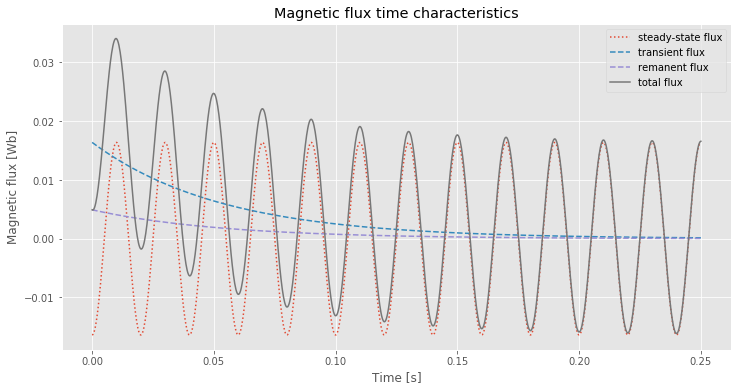

In [58]:
plt.figure(figsize=(12,6))
plt.plot(t, fi_s, label='steady-state flux', linestyle=':')
plt.plot(t, fi_t, label='transient flux', linestyle='--')
plt.plot(t, fi_re, label='remanent flux', linestyle='--')
plt.plot(t, fi_total, label='total flux')
plt.xlabel('Time [s]')
plt.ylabel('Magnetic flux [Wb]')
plt.title('Magnetic flux time characteristics')
plt.legend();

In [59]:
# inrush current
I_inrush = np.polyval(k, fi_total)

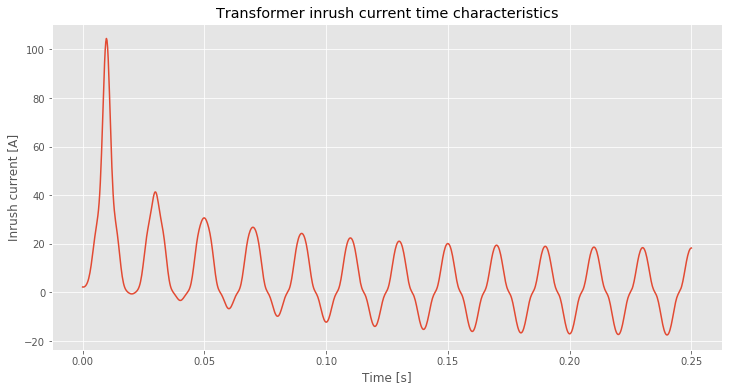

In [60]:
plt.figure(figsize=(12,6))
plt.plot(t, I_inrush)
plt.xlabel('Time [s]')
plt.ylabel('Inrush current [A]')
plt.title('Transformer inrush current time characteristics');